<a href="https://colab.research.google.com/github/ram1014/colab_files/blob/main/PracticaRegresionLinealSimple_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre:
  **Ramon Humberto Delgado Andrade**
*   Matrícula: **263165**

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [ ]:
#for google colab
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Escribe tu código aquí
# Cargar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#load dataframe local
#df = pd.read_csv("restaurantes.csv")
#load dataframe google
df = pd.read_csv("/content/drive/MyDrive/ClassFiles/restaurantes.csv")

display(df.head())
display(df.info())
display(df.describe())




,poblation,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   poblation  97 non-null     float64
 1   profit     97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


None

,poblation,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**

Al analizar la gráfica, no parece completamente lineal; sí existe un patrón donde se acumulan algunos puntos sobre una línea, pero sí existen varios puntos dispersos fuera de una línea.

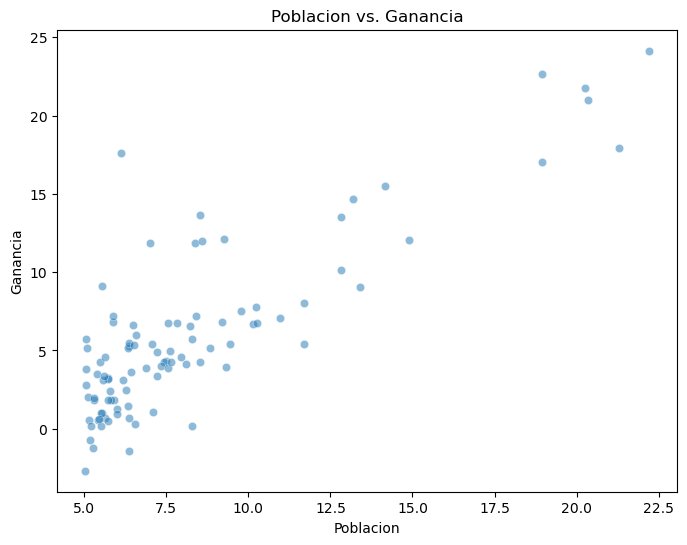

In [ ]:
# Diagrama de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['poblation'], y=df['profit'], alpha=0.5)
plt.xlabel("Poblacion")
plt.ylabel("Ganancia")
plt.title("Poblacion vs. Ganancia")
plt.show()

### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación?
- ¿Es positiva o negativa?
- ¿Es coherente con el gráfico anterior?

Matriz de correlación:
           poblation    profit
poblation   1.000000  0.837873
profit      0.837873  1.000000


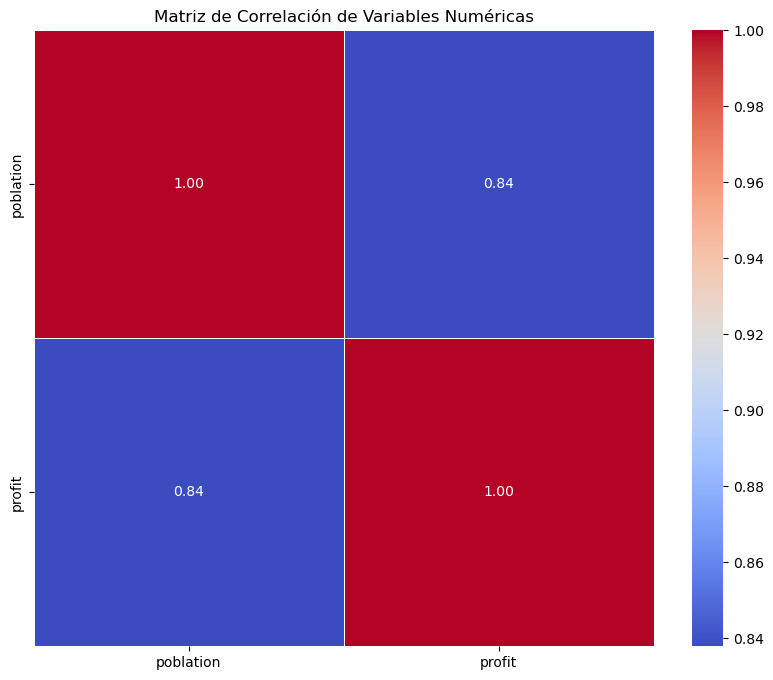

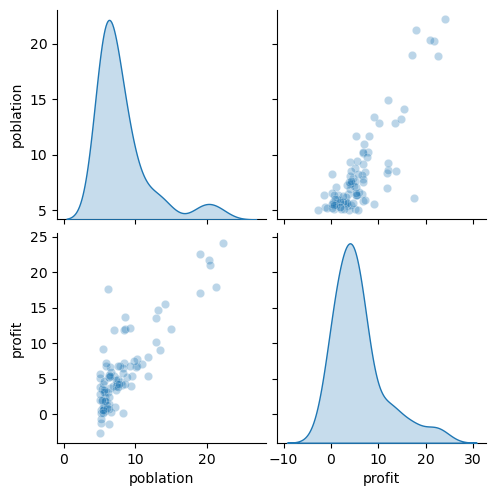

In [ ]:
# Cálculo de correlación
# Seleccionar solo las columnas numéricas

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Mostrar la matriz de correlación
print("Matriz de correlación:")
print(corr_matrix)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

# Crear un scatterplot para todas las combinaciones de variables numéricas
sns.pairplot(df, plot_kws={'alpha': 0.3}, diag_kind='kde')

# Mostrar el gráfico
plt.show()

* ¿Qué tan fuerte es la relación?

  La relacion es alta en .8
* ¿Es positiva o negativa?

  La relacion es positiva
* ¿Es coherente con el gráfico anterior?

  Si se notaba un poco la linealidead, pero no pense que el coeficiente de relacion entre las dos columnas fuera tan alto.

## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?

   **Esto es el valor de 'poblation' cuando el profit es 0.**
5. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?

   **Es el factor de cambio entre poblation y profit, esto quiere decir que mientras aumenta 'poblation' la 'ganancia' aumenta a un factor de 1.19**

Coeficiente (pendiente): 1.1930336441895932
Intercepto (ordenada al origen): -3.8957808783118484


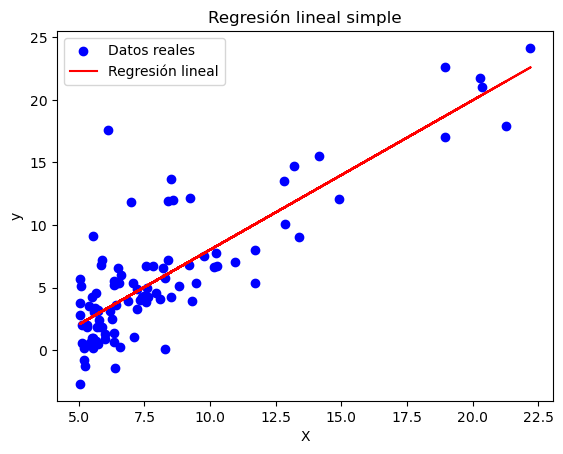

In [ ]:
# Construcción del modelo  y Coeficientes del modelo
X = df[['poblation']]
y = df['profit']
modelo_lineal = LinearRegression()

# Ajustar el modelo a los datos
modelo_lineal.fit(X, y)

# crear arreglo de prediccion
y_pred = modelo_lineal.predict(X)

# Mostrar coeficientes
print("Coeficiente (pendiente):", modelo_lineal.coef_[0])
print("Intercepto (ordenada al origen):", modelo_lineal.intercept_)



### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

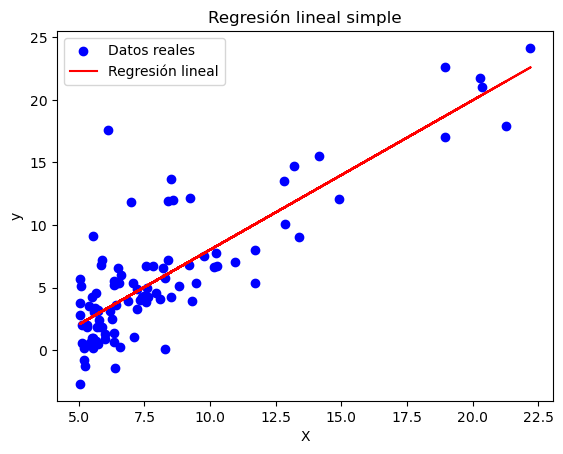

In [ ]:
# Visualización del modelo ajustado
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Regresión lineal simple')
plt.show()

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?

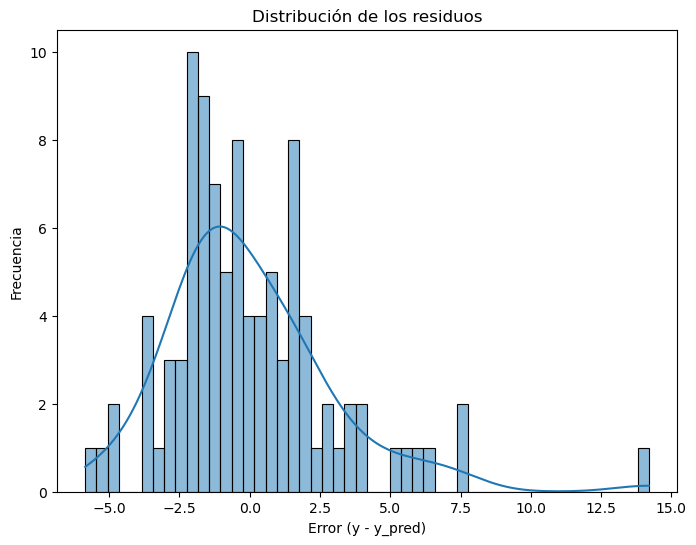

In [ ]:
# Normalidad de los residuos
# Histograma de residuos
residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel("Error (y - y_pred)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los residuos")
plt.show()

### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?

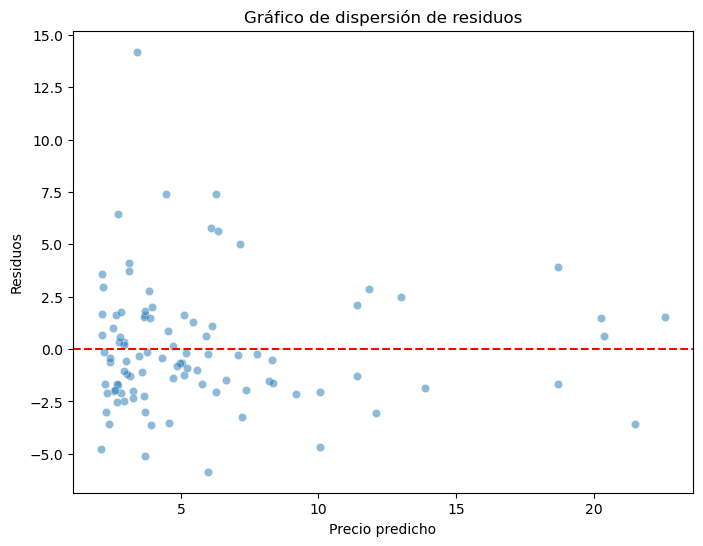

In [ ]:
# Gráfico de residuos vs predichos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Precio predicho")
plt.ylabel("Residuos")
plt.title("Gráfico de dispersión de residuos")
plt.show()

### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y b) Desviaciones sistemáticas indican asimetría o colas pesadas.

In [ ]:
# Q-Q Plot
# Función para realizar pruebas de normalidad
def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    # Prueba de Shapiro-Wilk
    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))  # Muestra de 5000 para evitar problemas de cómputo
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    # Prueba de Kolmogorov-Smirnov
    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    # Prueba de Anderson-Darling
    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    # Prueba de D'Agostino-Pearson
    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

# Función para graficar histograma y QQ-Plot
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="skyblue")
    plt.title(f"Distribución de {column_name}")

    # QQ-Plot
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

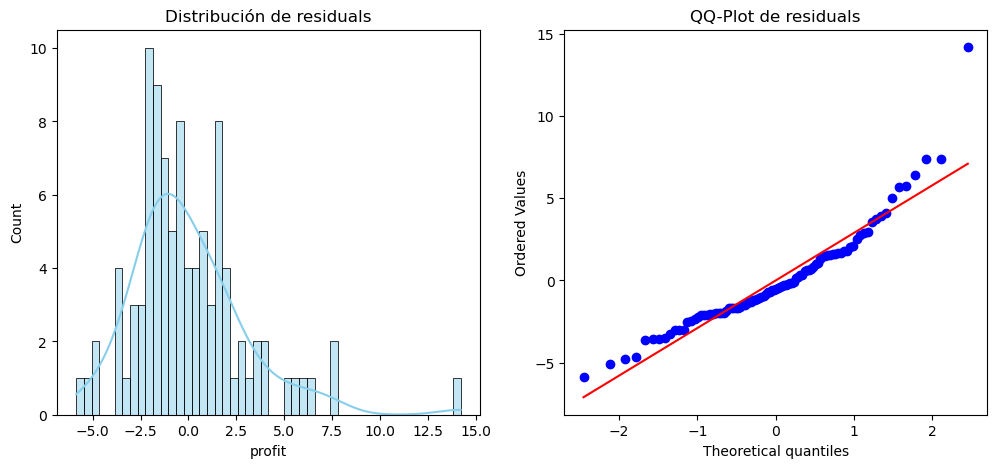


Pruebas de normalidad para la columna: residuals
Shapiro-Wilk Test: p-valor = 0.00001
Kolmogorov-Smirnov Test: p-valor = 0.14687
Anderson-Darling Test: Estadístico = 1.87901
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [ ]:
plot_distribution(residuals, 'residuals')
normality_tests(residuals, 'residuals')

## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?

In [ ]:
# Evaluación del modelo
MSE = mean_squared_error(y, y_pred)  # Error cuadrático medio
RMSE = np.sqrt(MSE)  # Raíz del error cuadrático medio
MAE = mean_absolute_error(y, y_pred)  # Error absoluto medio
R2 = r2_score(y, y_pred)  # Coeficiente de determinación

# Imprimir los resultados de las métricas
print("Evaluación del modelo Lineal simple:")
print(f"MSE: {MSE:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(f"MAE: {MAE:.2f}")
print(f"R^2: {R2:.4f}")

Evaluación del modelo Lineal simple:
MSE: 8.95
RMSE: 2.99
MAE: 2.19
R^2: 0.7020


## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo?

  **El modelo en este set de datos no es muy eficiente, me imagino que el set tendria que ser mas lineal para que se obtengan mejores resultatos**
- ¿Qué limitaciones encuentras?

  **Este modelo depende mucho de la relacion entre los datos, me imagino que al tener una correlacion mas cercana a 1 en los datos el modelo lineal tendra mejores resultados.**
- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.
  **En este caso creo que la estandarizacion de los datos no cambiara mucho el resultado ya que son solo 2 columnas y los datos mantendran la misma relacion**